In [2]:
import torchvision.datasets as datasets 
import numpy as np
import os
import json
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision

In [3]:
# Setup directory for train/test data 
train_file = 'data_niid_seed_0_train_8.json'
test_file = 'data_niid_seed_0_test_8.json'
current_dir = os.path.dirname(os.path.abspath(''))
data_dir = os.path.join(current_dir, 'emnist', 'data')
train_path = os.path.join(data_dir, 'train', train_file)
test_path = os.path.join(data_dir, 'test', test_file)
dir_path = os.path.dirname(train_path)
if not os.path.exists(dir_path): 
    os.makedirs(dir_path)
dir_path = os.path.dirname(test_path)
if not os.path.exists(dir_path): 
    os.makedirs(dir_path)

In [4]:
transform = torchvision.transforms.ToTensor()
emnist_byclass = datasets.EMNIST(root=data_dir, split='byclass' ,train=True, download=True, transform=transform)

In [5]:
batch_size=4
trainloader = DataLoader(emnist_byclass, batch_size=batch_size, shuffle=True, pin_memory=True)

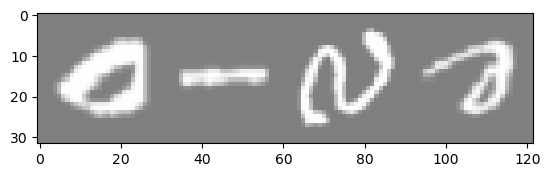

O     1     s     6    


In [11]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))

classes = '0123456789' + 'abcdefghijklmnopqrstuvwxyz' +  'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
# print labels
print(' '.join(f'{classes[labels[j]]:5}' for j in range(batch_size)))